### Mnist分类任务：

- 网络基本构建与训练方法，常用函数解析

- torch.nn.functional模块

- nn.Module模块


### 读取Mnist数据集
- 会自动进行下载

In [2]:
%matplotlib inline

In [3]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [4]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

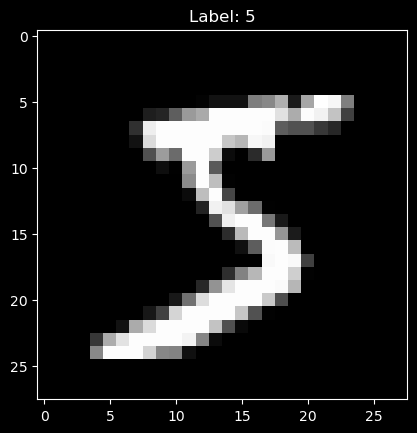

(50000, 784)


In [8]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
pyplot.title(f"Label: {y_train[0]}")
pyplot.show()
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

注意数据需转换成tensor才能参与后续建模训练


In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


C:\Users\35096\AppData\Local\Temp\ipykernel_23224\3405087846.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(


In [12]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### torch.nn.functional 很多层和函数在这里都会见到

torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional相对更简单一些

In [13]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [16]:
bs = 64
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]

weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 
bias = torch.zeros(10, requires_grad=True)

print(loss_func(model(xb), yb))

tensor(14.3677, grad_fn=<NllLossBackward0>)


In [18]:
model(xb)

tensor([[ 9.7517e+00,  1.7220e+01, -1.8858e+01, -4.5391e+00, -1.1065e+00,
          1.9577e+01, -5.7448e+00,  1.1325e+01, -1.5597e+00,  4.4707e+00],
        [-4.2804e+00,  1.0149e+01, -3.9134e+00, -2.2604e-01, -1.8573e+00,
          1.5483e+01,  1.3488e+00,  1.1315e+01, -4.5236e+00,  5.8638e+00],
        [ 1.6942e+00,  1.2521e+01,  3.3992e+00,  6.9644e+00,  1.5245e-01,
          8.9155e+00,  2.7447e+00,  3.6897e+00, -4.2529e+00,  8.7305e+00],
        [-4.7661e+00,  1.1291e+01,  3.3568e+00,  4.3298e+00,  1.2444e+01,
          1.0771e+01,  3.4301e+00,  7.8752e+00, -3.8323e+00, -1.4640e+01],
        [-8.7798e+00,  7.4220e+00, -2.1896e+01,  2.6420e+00,  1.0136e+01,
          5.8930e+00, -1.2062e+01,  4.9830e-02,  2.2158e+01, -9.5152e+00],
        [-4.2178e+00,  4.7196e+00, -4.0512e+00, -4.1951e+00,  7.8599e+00,
          1.2947e+01, -2.2123e+00,  3.3733e+00,  1.8175e+01,  7.9120e+00],
        [ 1.2273e+00,  5.7650e+00, -3.6283e+00, -4.2803e-01,  8.2465e+00,
          1.3413e+01,  7.2888e-0

### 创建一个model来更简化代码

- 必须继承nn.Module且在其构造函数中需调用nn.Module的构造函数
- 无需写反向传播函数，nn.Module能够利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器

In [19]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out  = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x
        

In [34]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,256)
        self.out = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        x = self.out(x)
        return x

In [25]:
net = Mnist_NN()
print(net)


Mnist_NN(
  (hidden1): Linear(in_features=748, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


可以打印我们定义好名字里的权重和偏置项

In [27]:
for name, parameter in net.named_parameters():
    print(name, parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[-0.0024, -0.0247, -0.0280,  ...,  0.0326, -0.0044, -0.0326],
        [-0.0095,  0.0248,  0.0071,  ..., -0.0362,  0.0105,  0.0004],
        [-0.0136,  0.0219,  0.0103,  ...,  0.0219, -0.0197,  0.0336],
        ...,
        [ 0.0093, -0.0203, -0.0106,  ...,  0.0148,  0.0313,  0.0301],
        [-0.0359,  0.0009,  0.0237,  ...,  0.0077, -0.0002, -0.0156],
        [-0.0203,  0.0097, -0.0330,  ..., -0.0163, -0.0169, -0.0311]],
       requires_grad=True) torch.Size([128, 748])
hidden1.bias Parameter containing:
tensor([-0.0258,  0.0012, -0.0191, -0.0111, -0.0243,  0.0323,  0.0109,  0.0080,
        -0.0281, -0.0051,  0.0259,  0.0125,  0.0272, -0.0267,  0.0008, -0.0254,
         0.0248, -0.0241, -0.0170,  0.0297, -0.0132, -0.0116, -0.0213,  0.0187,
         0.0018, -0.0299, -0.0201, -0.0245,  0.0142, -0.0273,  0.0355,  0.0016,
        -0.0222, -0.0127, -0.0053, -0.0034,  0.0213, -0.0177,  0.0100, -0.0209,
         0.0143, -0.0090, -0.0122,  0.0299, 

### 使用TensorDataset和DataLoader来简化

In [28]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [29]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

- 一般在训练模型时加上model.train()，这样会正常使用Batch Normalization和 Dropout
- 测试的时候一般选择model.eval()，这样就不会使用Batch Normalization和 Dropout

In [30]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [41]:
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.Adam(model.parameters(), lr=0.001)

In [32]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

### 三行搞定！

In [42]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

当前step:0 验证集损失：0.19152491383850576
当前step:1 验证集损失：0.13904689227864145
当前step:2 验证集损失：0.12155318278521299
当前step:3 验证集损失：0.11487540697678923
当前step:4 验证集损失：0.10863512820750475
当前step:5 验证集损失：0.10157143532373011
当前step:6 验证集损失：0.097484915202111
当前step:7 验证集损失：0.09357520265276544
当前step:8 验证集损失：0.09406136996485293
当前step:9 验证集损失：0.09482229723837227
当前step:10 验证集损失：0.08786968435631133
当前step:11 验证集损失：0.09127443727590144
当前step:12 验证集损失：0.08718334183003754
当前step:13 验证集损失：0.07920797687489539
当前step:14 验证集损失：0.0831434434151277
当前step:15 验证集损失：0.08275060270286631
当前step:16 验证集损失：0.08647874920270406
当前step:17 验证集损失：0.08648322910647839
当前step:18 验证集损失：0.0873780925866682
当前step:19 验证集损失：0.08718246123990975
当前step:20 验证集损失：0.08567879856070504
当前step:21 验证集损失：0.08631247717756778
当前step:22 验证集损失：0.0818875800734153
当前step:23 验证集损失：0.08449073646669276
当前step:24 验证集损失：0.0826302022928372


In [43]:
correct = 0
total = 0
for xb, yb in valid_dl:
    outputs = model(xb)
    _, predicted = torch.max(outputs.data, 1)
    total += yb.size(0)
    correct += (predicted == yb).sum().item()

print('验证集准确率: %d %%' % (100 * correct / total))

验证集准确率: 97 %
